In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression

In [82]:
data=pd.read_excel('./input_data_quiz.xlsx')

In [83]:
data.head()

,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,5599.0,15/9-F-12,11.50,308.056,104.418,201.250,18.640,14.48443,106.806,16.295,92.475,285.0,38889.0,385.0
1,5599.0,15/9-F-12,24.00,303.034,105.403,182.145,16.467,22.83299,120.889,53.374,89.620,1870.0,285246.0,7.0
2,5599.0,15/9-F-12,22.50,295.586,105.775,181.868,12.660,31.24997,113.718,72.738,80.120,3124.0,509955.0,1.0
3,5599.0,15/9-F-12,23.15,297.663,105.752,180.832,5.264,28.51893,116.831,69.996,84.251,2608.0,383427.0,1.0
4,5599.0,15/9-F-12,24.00,295.936,105.811,180.501,12.385,30.22790,115.434,71.518,82.359,3052.0,418474.0,5.0


In [84]:
data.describe()

,NPD_WELL_BORE_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
count,2498.0,2499.000000,2498.000000,2492.000000,2493.000000,2492.000000,2495.000000,2495.000000,2496.000000,2496.000000,2490.000000,2495.000000,2495.000000
mean,5599.0,21.204106,98.946740,40.659215,97.328776,16.690249,66.177557,52.143907,80.020514,22.623661,1752.616867,255293.340681,2503.943487
std,0.0,6.970983,125.947923,51.722656,74.578452,6.578753,29.862094,24.416289,19.990477,23.531784,1736.284570,245136.405876,2057.812677
min,5599.0,0.000000,0.000000,0.000000,0.058000,0.000000,0.000000,0.000000,0.035000,0.058000,0.000000,0.000000,-458.000000
25%,5599.0,24.000000,0.000000,0.000000,33.614000,13.182000,48.259940,33.560500,79.332250,4.868250,295.500000,46059.000000,54.000000
50%,5599.0,24.000000,0.000000,0.000000,48.992000,16.474500,65.974740,45.963000,88.067500,14.415000,968.500000,149118.000000,3088.000000
75%,5599.0,24.000000,250.771250,106.397250,175.979000,20.661500,99.169365,64.519500,90.552000,32.230250,3056.250000,445882.000000,4554.000000
max,5599.0,25.000000,317.701000,107.508000,314.409000,30.020000,100.000000,137.311000,92.459000,124.123000,5902.000000,851132.000000,8020.000000


In [85]:
data.corr()

,NPD_WELL_BORE_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
NPD_WELL_BORE_CODE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ON_STREAM_HRS,NaN,1.000000,0.108602,0.126038,0.019157,0.612369,0.651203,-0.129777,0.835241,-0.312762,0.346313,0.356857,0.404652
AVG_DOWNHOLE_PRESSURE,NaN,0.108602,1.000000,0.994990,0.964438,0.031453,-0.369067,0.591188,-0.098275,0.542167,0.801245,0.797545,-0.668689
AVG_DOWNHOLE_TEMPERATURE,NaN,0.126038,0.994990,1.000000,0.957458,0.038932,-0.347427,0.579390,-0.084524,0.524946,0.834570,0.829140,-0.678929
AVG_DP_TUBING,NaN,0.019157,0.964438,0.957458,1.000000,0.039499,-0.443324,0.649699,-0.193916,0.610554,0.751413,0.746197,-0.681859
AVG_ANNULUS_PRESS,NaN,0.612369,0.031453,0.038932,0.039499,1.000000,0.339600,-0.167605,0.630307,-0.318541,0.146226,0.146906,0.308780
AVG_CHOKE_SIZE_P,NaN,0.651203,-0.369067,-0.347427,-0.443324,0.339600,1.000000,-0.590928,0.753879,-0.697828,-0.156612,-0.154125,0.793581
AVG_WHP_P,NaN,-0.129777,0.591188,0.579390,0.649699,-0.167605,-0.590928,1.000000,-0.363425,0.960533,0.476642,0.479222,-0.673222
AVG_WHT_P,NaN,0.835241,-0.098275,-0.084524,-0.193916,0.630307,0.753879,-0.363425,1.000000,-0.558867,0.108877,0.117924,0.582176
DP_CHOKE_SIZE,NaN,-0.312762,0.542167,0.524946,0.610554,-0.318541,-0.697828,0.960533,-0.558867,1.000000,0.377183,0.378724,-0.720370


# EDA

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
NPD_WELL_BORE_CODE          2498 non-null float64
NPD_WELL_BORE_NAME          2500 non-null object
ON_STREAM_HRS               2499 non-null float64
AVG_DOWNHOLE_PRESSURE       2498 non-null float64
AVG_DOWNHOLE_TEMPERATURE    2492 non-null float64
AVG_DP_TUBING               2493 non-null float64
AVG_ANNULUS_PRESS           2492 non-null float64
AVG_CHOKE_SIZE_P            2495 non-null float64
AVG_WHP_P                   2495 non-null float64
AVG_WHT_P                   2496 non-null float64
DP_CHOKE_SIZE               2496 non-null float64
BORE_OIL_VOL                2490 non-null float64
BORE_GAS_VOL                2495 non-null float64
BORE_WAT_VOL                2495 non-null float64
dtypes: float64(13), object(1)
memory usage: 273.6+ KB


In [87]:
data['NPD_WELL_BORE_CODE']

0       5599.0
1       5599.0
2       5599.0
3       5599.0
4       5599.0
         ...  
2495    5599.0
2496    5599.0
2497    5599.0
2498    5599.0
2499    5599.0
Name: NPD_WELL_BORE_CODE, Length: 2500, dtype: float64

In [88]:
data['NPD_WELL_BORE_CODE'].value_counts()

5599.0    2498
Name: NPD_WELL_BORE_CODE, dtype: int64

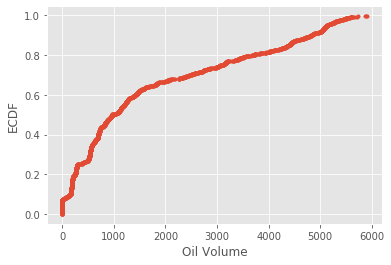

In [89]:
#Empirical Cumulative Distribution Function
%matplotlib inline
plt.style.use('ggplot')
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1,n+1)/n
    return x,y
x, y = ecdf(data['BORE_OIL_VOL'])
plt.plot(x, y, marker=".", linestyle="none")
plt.xlabel('Oil Volume')
plt.ylabel('ECDF')
plt.show()

In [90]:
dataf = data.select_dtypes(include = 'float')
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
NPD_WELL_BORE_CODE          2498 non-null float64
ON_STREAM_HRS               2499 non-null float64
AVG_DOWNHOLE_PRESSURE       2498 non-null float64
AVG_DOWNHOLE_TEMPERATURE    2492 non-null float64
AVG_DP_TUBING               2493 non-null float64
AVG_ANNULUS_PRESS           2492 non-null float64
AVG_CHOKE_SIZE_P            2495 non-null float64
AVG_WHP_P                   2495 non-null float64
AVG_WHT_P                   2496 non-null float64
DP_CHOKE_SIZE               2496 non-null float64
BORE_OIL_VOL                2490 non-null float64
BORE_GAS_VOL                2495 non-null float64
BORE_WAT_VOL                2495 non-null float64
dtypes: float64(13)
memory usage: 254.0 KB


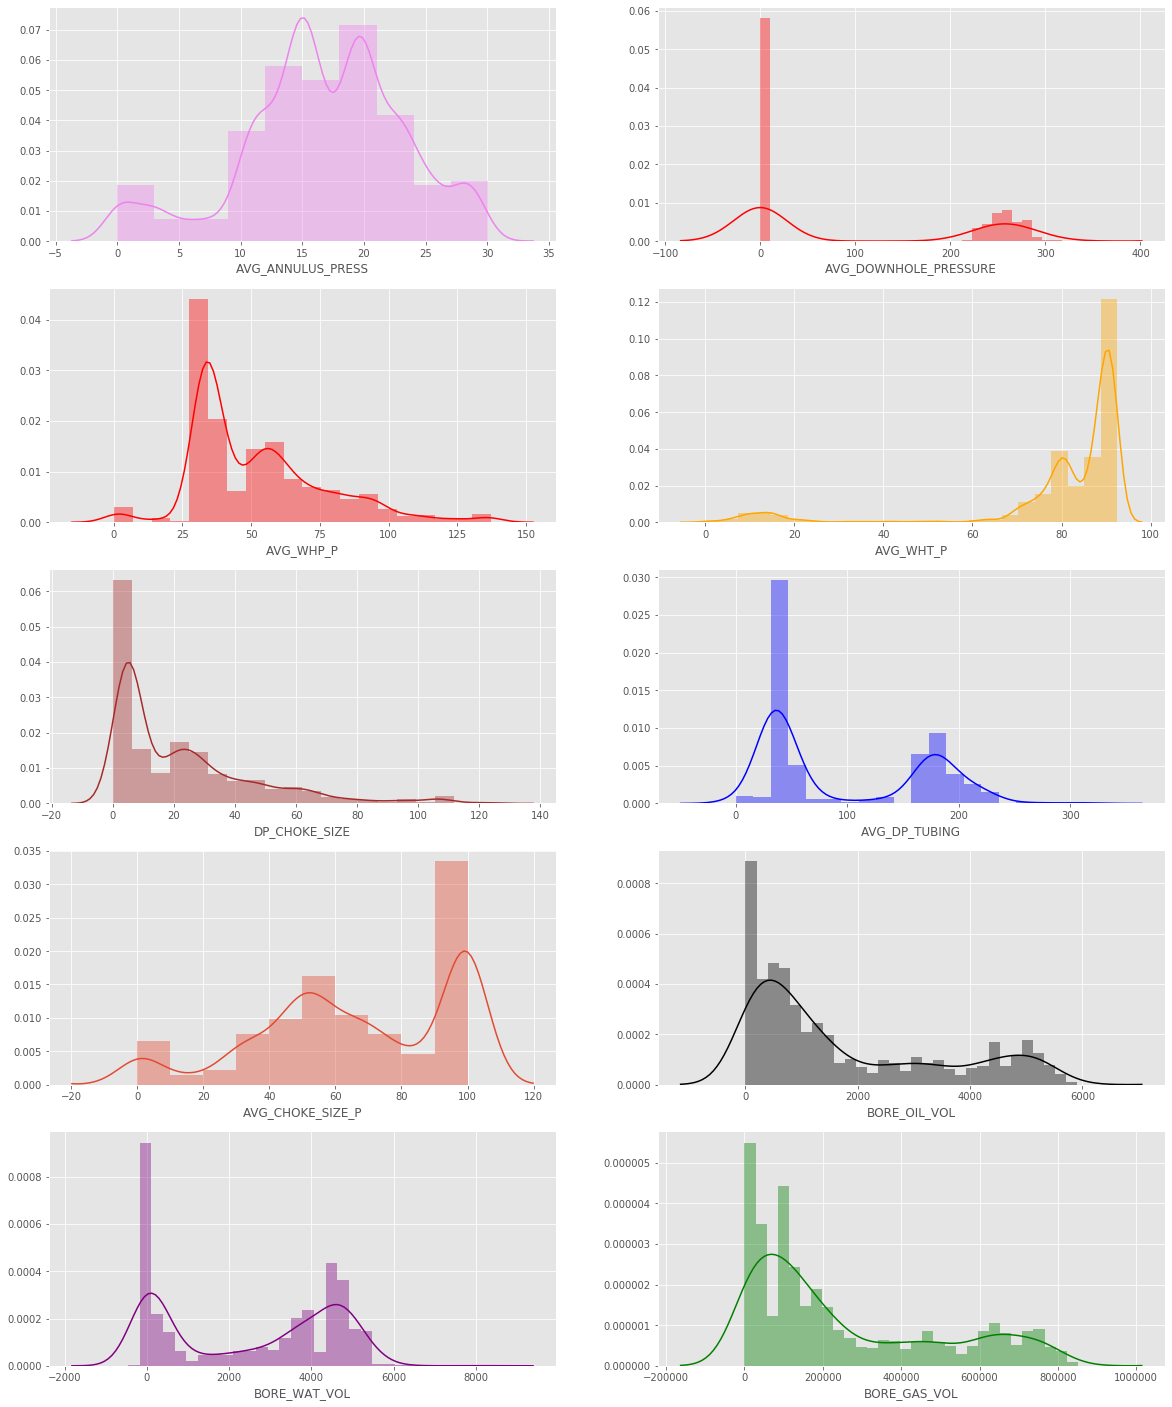

In [91]:
fig, axes = plt.subplots(5, 2,figsize=[20,25])
sns.distplot(dataf['AVG_ANNULUS_PRESS'],bins=10,color='violet',kde=bool,ax=axes[0,0])
sns.distplot(dataf['AVG_DOWNHOLE_PRESSURE'],bins=30,color='red',kde=bool,ax=axes[0,1])
sns.distplot(dataf['AVG_WHP_P'],bins=20,color='red',kde=bool,ax=axes[1,0])
sns.distplot(dataf['AVG_WHT_P'],bins=25,color='orange',kde=bool,ax=axes[1,1])
sns.distplot(dataf['DP_CHOKE_SIZE'],bins=20,color='brown',kde=bool,ax=axes[2,0])
sns.distplot(dataf['AVG_DP_TUBING'],bins=20,color='blue',kde=bool,ax=axes[2,1])
sns.distplot(dataf['AVG_CHOKE_SIZE_P'],bins=10,kde=bool,ax=axes[3,0])
sns.distplot(dataf['BORE_OIL_VOL'],bins=30,kde=bool,ax=axes[3,1],color='black')
sns.distplot(dataf['BORE_WAT_VOL'],bins=30,kde=bool,ax=axes[4,0],color='purple')
sns.distplot(dataf['BORE_GAS_VOL'],bins=30,kde=bool,ax=axes[4,1],color='green')
plt.show()

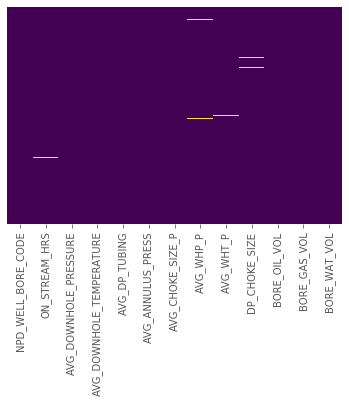

In [92]:
sns.heatmap(dataf.isnull(),yticklabels=False,cbar=False,cmap='viridis') #Yellow lines represent null values

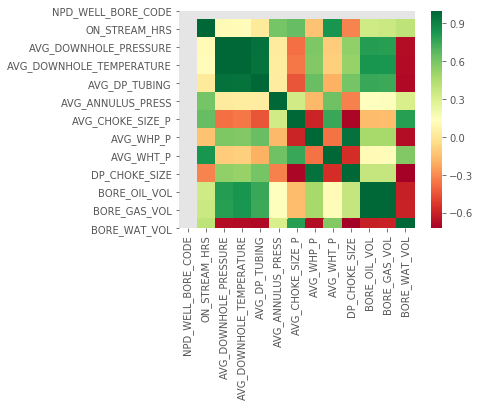

In [93]:
sns.heatmap(dataf.corr(),square=True,cmap='RdYlGn') 
#High correlation b/w 'AVG_DOWNHOLE_PRESSURE','AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING' and b/w 'BORE_OIL_VOL', 'BORE_GAS_VOL'

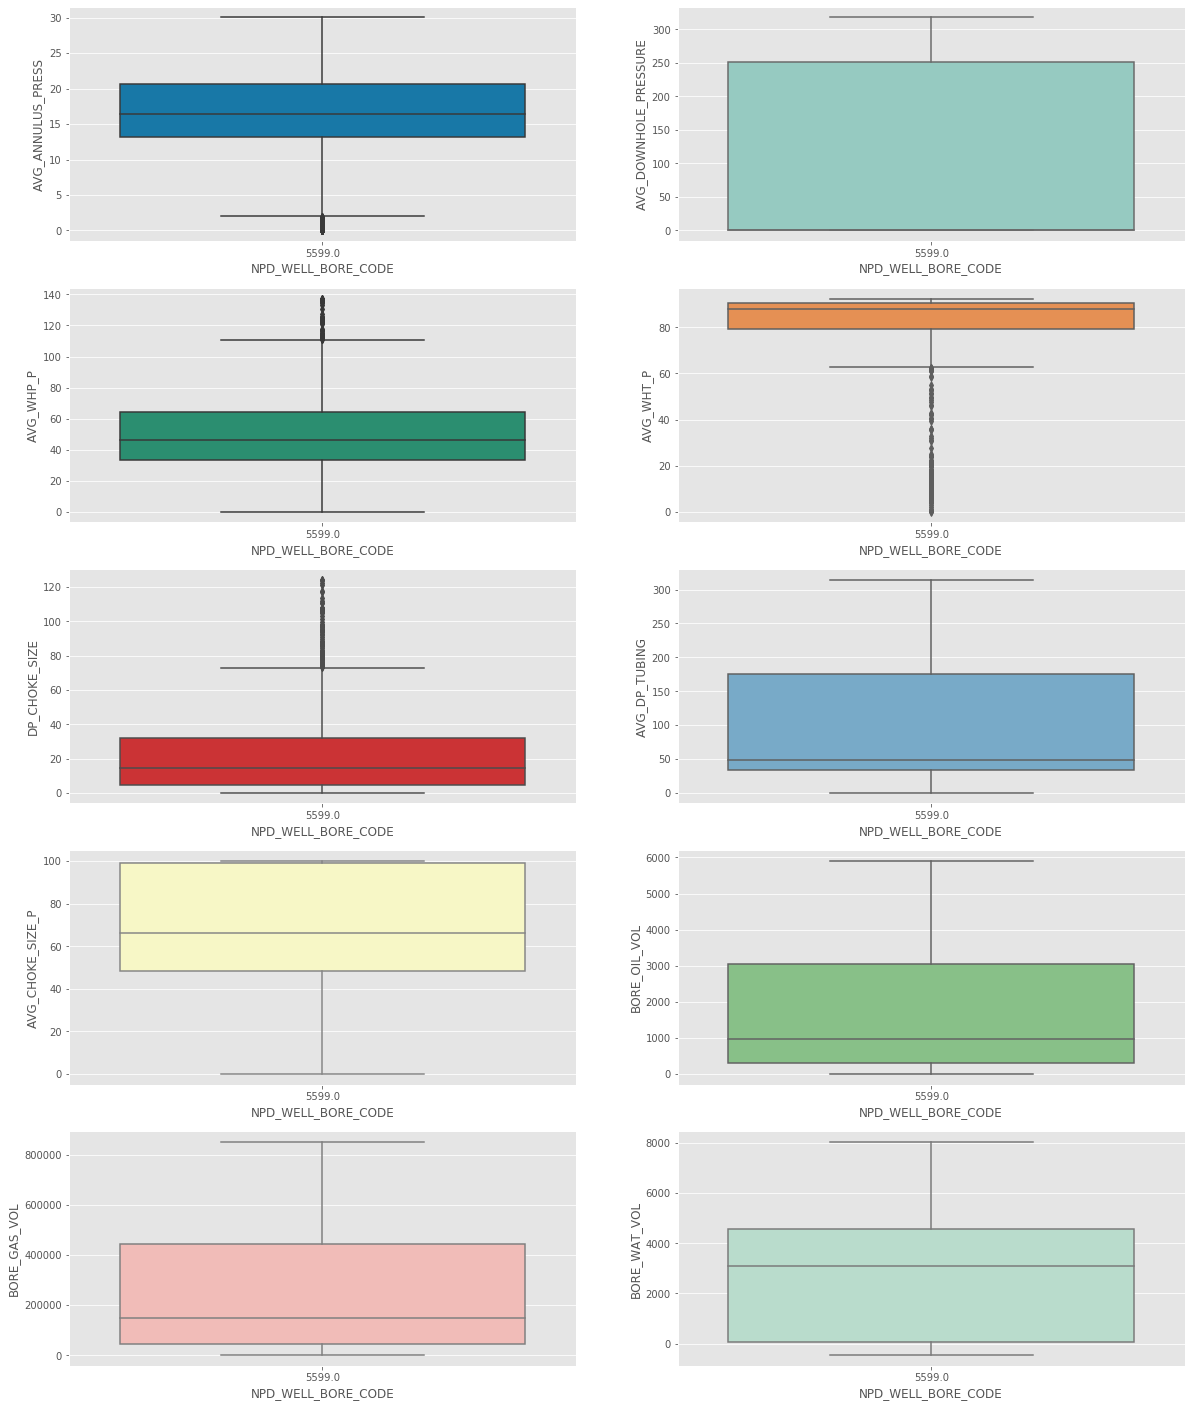

In [94]:
fig, axes = plt.subplots(5, 2,figsize=[20,25])
sns.boxplot(x='NPD_WELL_BORE_CODE', y='AVG_ANNULUS_PRESS',data=dataf, palette="winter",ax=axes[0,0])
sns.boxplot(x='NPD_WELL_BORE_CODE', y='AVG_DOWNHOLE_PRESSURE', data=dataf, palette="Set3", ax=axes[0,1])
sns.boxplot(x='NPD_WELL_BORE_CODE', y='AVG_WHP_P', data=dataf, palette="Dark2", ax=axes[1,0])
sns.boxplot(x='NPD_WELL_BORE_CODE', y='AVG_WHT_P', data=dataf, palette="Oranges", ax=axes[1,1])
sns.boxplot(x='NPD_WELL_BORE_CODE', y='DP_CHOKE_SIZE', data=dataf, palette="Set1", ax=axes[2,0])
sns.boxplot(x='NPD_WELL_BORE_CODE', y='AVG_DP_TUBING', data=dataf, palette="Blues", ax=axes[2,1])
sns.boxplot(x='NPD_WELL_BORE_CODE', y='AVG_CHOKE_SIZE_P', data=dataf, palette="Spectral", ax=axes[3,0])
sns.boxplot(x='NPD_WELL_BORE_CODE', y='BORE_OIL_VOL', data=dataf, palette="Accent", ax=axes[3,1])
sns.boxplot(x='NPD_WELL_BORE_CODE', y='BORE_GAS_VOL', data=dataf, palette="Pastel1", ax=axes[4,0])
sns.boxplot(x='NPD_WELL_BORE_CODE', y='BORE_WAT_VOL', data=dataf, palette="Pastel2", ax=axes[4,1])

In [95]:
data.skew(axis = 0, skipna = True) #Returns unbiased skew over the requested axis normalised by n-1

NPD_WELL_BORE_CODE          0.000000
ON_STREAM_HRS              -2.395779
AVG_DOWNHOLE_PRESSURE       0.505743
AVG_DOWNHOLE_TEMPERATURE    0.487676
AVG_DP_TUBING               0.503274
AVG_ANNULUS_PRESS          -0.469277
AVG_CHOKE_SIZE_P           -0.475863
AVG_WHP_P                   0.998803
AVG_WHT_P                  -2.719662
DP_CHOKE_SIZE               1.613174
BORE_OIL_VOL                0.887418
BORE_GAS_VOL                0.866254
BORE_WAT_VOL               -0.095986
dtype: float64

In [96]:
(data==0).sum()

NPD_WELL_BORE_CODE             0
NPD_WELL_BORE_NAME             0
ON_STREAM_HRS                176
AVG_DOWNHOLE_PRESSURE       1539
AVG_DOWNHOLE_TEMPERATURE    1539
AVG_DP_TUBING                  0
AVG_ANNULUS_PRESS             39
AVG_CHOKE_SIZE_P              55
AVG_WHP_P                      1
AVG_WHT_P                      0
DP_CHOKE_SIZE                  0
BORE_OIL_VOL                 178
BORE_GAS_VOL                 176
BORE_WAT_VOL                 275
dtype: int64

In [97]:
data.isnull().sum()

NPD_WELL_BORE_CODE           2
NPD_WELL_BORE_NAME           0
ON_STREAM_HRS                1
AVG_DOWNHOLE_PRESSURE        2
AVG_DOWNHOLE_TEMPERATURE     8
AVG_DP_TUBING                7
AVG_ANNULUS_PRESS            8
AVG_CHOKE_SIZE_P             5
AVG_WHP_P                    5
AVG_WHT_P                    4
DP_CHOKE_SIZE                4
BORE_OIL_VOL                10
BORE_GAS_VOL                 5
BORE_WAT_VOL                 5
dtype: int64

# Data Cleaning

In [98]:
data.fillna(method='pad',inplace=True)

In [162]:
data['ON_STREAM_HRS'].replace(0,method='pad',inplace=True)

data['AVG_DOWNHOLE_PRESSURE'].replace(0,data['AVG_DOWNHOLE_PRESSURE'].mean(),inplace=True)

data['AVG_DOWNHOLE_TEMPERATURE'].replace(0,method='bfill',inplace=True)

data['AVG_DP_TUBING'].replace(0,data['AVG_DP_TUBING'].mean(),inplace=True)

data['AVG_ANNULUS_PRESS'].replace(0,data['AVG_ANNULUS_PRESS'].median(),inplace=True)

data['AVG_CHOKE_SIZE_P'].replace(0,data['AVG_CHOKE_SIZE_P'].mean(),inplace=True)

data['AVG_WHP_P'].replace(0,data['AVG_WHP_P'].mean(),inplace=True)

data['AVG_WHT_P'].replace(0,data['AVG_WHT_P'].mean(),inplace=True)

data['DP_CHOKE_SIZE'].replace(0,data['DP_CHOKE_SIZE'].median(),inplace=True)

data['BORE_OIL_VOL'].replace(0,data['BORE_OIL_VOL'].median(),inplace=True)

data['BORE_GAS_VOL'].replace(0,data['BORE_GAS_VOL'].median(),inplace=True)

data['BORE_WAT_VOL'].replace(0,data['BORE_WAT_VOL'].median(),inplace=True)

In [163]:
(data==0).sum()

NPD_WELL_BORE_CODE          0
NPD_WELL_BORE_NAME          0
ON_STREAM_HRS               0
AVG_DOWNHOLE_PRESSURE       0
AVG_DOWNHOLE_TEMPERATURE    0
AVG_DP_TUBING               0
AVG_ANNULUS_PRESS           0
AVG_CHOKE_SIZE_P            0
AVG_WHP_P                   0
AVG_WHT_P                   0
DP_CHOKE_SIZE               0
BORE_OIL_VOL                0
BORE_GAS_VOL                0
BORE_WAT_VOL                0
dtype: int64

In [164]:
data.isnull().sum()

NPD_WELL_BORE_CODE          0
NPD_WELL_BORE_NAME          0
ON_STREAM_HRS               0
AVG_DOWNHOLE_PRESSURE       0
AVG_DOWNHOLE_TEMPERATURE    0
AVG_DP_TUBING               0
AVG_ANNULUS_PRESS           0
AVG_CHOKE_SIZE_P            0
AVG_WHP_P                   0
AVG_WHT_P                   0
DP_CHOKE_SIZE               0
BORE_OIL_VOL                0
BORE_GAS_VOL                0
BORE_WAT_VOL                0
dtype: int64

In [165]:
data.columns

Index(['NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL'],
      dtype='object')

In [166]:
data['BORE_OIL_VOL'].mean()

1822.902

# Scaling and Training

In [167]:
#Scaling dataset to remove difference in distributions within columns

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data[['ON_STREAM_HRS','AVG_DP_TUBING','AVG_ANNULUS_PRESS','AVG_CHOKE_SIZE_P','AVG_WHP_P','AVG_WHT_P','DP_CHOKE_SIZE','BORE_WAT_VOL','BORE_GAS_VOL']] = scaler.fit_transform(data[['ON_STREAM_HRS','AVG_DP_TUBING','AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P','AVG_WHP_P', 'AVG_WHT_P','DP_CHOKE_SIZE','BORE_WAT_VOL','BORE_GAS_VOL']])

X= data.drop(['NPD_WELL_BORE_CODE','NPD_WELL_BORE_NAME','AVG_DOWNHOLE_PRESSURE','AVG_DOWNHOLE_TEMPERATURE','BORE_OIL_VOL'], axis=1)

y= data['BORE_OIL_VOL']

# y.head()

#Applying Linear Regression
X_train, X_valid, y_train, y_valid = train_test_split(X, y,train_size = 0.8, random_state=42)

reg = LinearRegression()

In [168]:
(data==0).sum()

NPD_WELL_BORE_CODE           0
NPD_WELL_BORE_NAME           0
ON_STREAM_HRS               31
AVG_DOWNHOLE_PRESSURE        0
AVG_DOWNHOLE_TEMPERATURE     0
AVG_DP_TUBING                1
AVG_ANNULUS_PRESS            1
AVG_CHOKE_SIZE_P             1
AVG_WHP_P                    1
AVG_WHT_P                    1
DP_CHOKE_SIZE                4
BORE_OIL_VOL                 0
BORE_GAS_VOL                 1
BORE_WAT_VOL                18
dtype: int64

In [169]:
len(X_train)

2000

In [170]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [171]:
X_valid

,ON_STREAM_HRS,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_GAS_VOL,BORE_WAT_VOL
1447,0.958966,0.109223,0.498266,1.000000,0.250231,0.993083,0.043194,0.159449,0.566475
1114,0.418547,0.147240,0.648989,0.578622,0.337331,0.944683,0.108987,0.092979,0.199800
1064,0.958966,0.166851,0.733407,0.506834,0.382258,0.962738,0.158882,0.249037,0.465577
2287,0.958966,0.103664,0.645954,0.979098,0.237496,0.956875,0.027749,0.030455,0.659017
1537,0.630693,0.155463,0.257555,0.564550,0.356168,0.843262,0.060642,0.071429,0.360688
...,...,...,...,...,...,...,...,...,...
2375,0.958966,0.103696,0.632446,1.000000,0.237569,0.957332,0.030220,0.033707,0.594911
1609,0.000000,0.004350,0.000967,0.005532,0.009965,0.150626,0.009002,0.174615,0.385133
596,0.958966,0.590018,0.731305,0.628730,0.487137,0.895674,0.268249,0.833253,0.002744
84,0.958966,0.544908,0.418785,0.328919,0.670440,0.834539,0.485383,0.574639,0.000249


In [172]:
y_validpred = reg.predict(X_valid)

In [173]:
print("The R-square value for linear regression for oil volume production is", reg.score(X_valid, y_valid))

The R-square value for linear regression for oil volume production is 0.9963844725050909


In [195]:
from sklearn import metrics
print('Validation MAE for Linear Regression:',metrics.mean_absolute_error(y_valid, y_validpred))

Validation MAE for Linear Regression: 60.80855505238037


In [196]:
print('Validation MSE for Linear Regression:', metrics.mean_squared_error(y_valid, y_validpred))

Validation MSE for Linear Regression: 9605.637504682172


In [197]:
reg.coef_[0]

-63.218982854771205

In [198]:
reg.intercept_

-27.402160988916194

In [199]:
impt= reg.coef_
# summarize feature importance
for i,k in enumerate(impt):
    print('Feature: %0d, Score: %.2f' % (i,k))

Feature: 0, Score: -63.22
Feature: 1, Score: 132.83
Feature: 2, Score: 61.00
Feature: 3, Score: 118.90
Feature: 4, Score: 183.60
Feature: 5, Score: -76.51
Feature: 6, Score: -260.87
Feature: 7, Score: 5916.67
Feature: 8, Score: -147.84


In [200]:
datatest=pd.read_excel('./test_data_quiz.xlsx')
datatest.head()

,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_GAS_VOL,BORE_WAT_VOL
0,5599,15/9-F-12,24.0,0,0,52.147,28.714,35.23351,52.147,72.510,23.500,105134.0,712.0
1,5599,15/9-F-12,24.0,0,0,51.696,28.870,35.46763,51.696,73.466,23.056,105584.0,716.0
2,5599,15/9-F-12,24.0,0,0,51.508,28.703,35.57401,51.508,72.680,22.845,103868.0,720.0
3,5599,15/9-F-12,24.0,0,0,51.184,28.510,35.65656,51.184,71.846,22.524,104654.0,732.0
4,5599,15/9-F-12,24.0,0,0,50.529,28.338,35.71326,50.529,71.837,21.861,105072.0,717.0


In [201]:
X_test= datatest.drop(['NPD_WELL_BORE_CODE','NPD_WELL_BORE_NAME','AVG_DOWNHOLE_PRESSURE','AVG_DOWNHOLE_TEMPERATURE'],axis=1)
X_test.head()

,ON_STREAM_HRS,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_GAS_VOL,BORE_WAT_VOL
0,24.0,52.147,28.714,35.23351,52.147,72.510,23.500,105134.0,712.0
1,24.0,51.696,28.870,35.46763,51.696,73.466,23.056,105584.0,716.0
2,24.0,51.508,28.703,35.57401,51.508,72.680,22.845,103868.0,720.0
3,24.0,51.184,28.510,35.65656,51.184,71.846,22.524,104654.0,732.0
4,24.0,50.529,28.338,35.71326,50.529,71.837,21.861,105072.0,717.0


In [202]:
X_test.fillna(method='ffill',inplace=True)

In [203]:
X_test[['ON_STREAM_HRS','AVG_DP_TUBING','AVG_ANNULUS_PRESS','AVG_CHOKE_SIZE_P',
     'AVG_WHP_P','AVG_WHT_P','DP_CHOKE_SIZE','BORE_WAT_VOL','BORE_GAS_VOL']]=scaler.fit_transform(X_test[['ON_STREAM_HRS','AVG_DP_TUBING','AVG_ANNULUS_PRESS','AVG_CHOKE_SIZE_P',
     'AVG_WHP_P','AVG_WHT_P','DP_CHOKE_SIZE','BORE_WAT_VOL','BORE_GAS_VOL']])

In [204]:
y_testpred = reg.predict(X_test)
res=pd.DataFrame(y_testpred)

In [205]:
res.to_csv(r'.\resultLinearRegression.csv', index=False)

# Random Forest

In [206]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=1)
rf_model.fit(X_train,y_train)
y_valpred = rf_model.predict(X_valid)

print('Validation MAE for Random Forest Model:',metrics.mean_absolute_error(y_valid, y_valpred))
print('Validation MSE for Random Forest Model:', metrics.mean_squared_error(y_valid, y_valpred))
print('Validation RMSE for Random Forest Model:', np.sqrt(metrics.mean_squared_error(y_valid, y_valpred)))

Validation MAE for Random Forest Model: 26.533909999999995
Validation MSE for Random Forest Model: 4179.56373045
Validation RMSE for Random Forest Model: 64.64954547752056


In [207]:
print("The R-square value for Random Forest regression for oil volume production is", rf_model.score(X_valid, y_valid))

The R-square value for Random Forest regression for oil volume production is 0.9984268272067521


In [208]:
y_rfpred = rf_model.predict(X_test)
resrf = pd.DataFrame(y_rfpred)

In [209]:
res.to_csv(r'.\resultRandomForest.csv', index=False)

# XGBoost

In [210]:
from xgboost import XGBRegressor
boost = XGBRegressor(max_depth=5,eta=0.2,gamma=200, reg_alpha=0.8, reg_lambda=0.5,random_state=42,n_estimators=200,verbosity=1)

In [211]:
boost.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.2, gamma=200,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.200000003, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0.8,
             reg_lambda=0.5, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=1)

In [212]:
y_xgpred = boost.predict(X_valid)

In [213]:
print("Validation MSE for XGBoost Model:",metrics.mean_squared_error(y_xgpred,y_valid))

Validation MSE for XGBoost Model: 3503.8518009162167


In [214]:
y_xgtestpred = boost.predict(X_test)
resxg = pd.DataFrame(y_xgtestpred)

In [215]:
resxg.to_csv(r'.\resultXGBoost.csv', index=False)